# Laboratorio 6 - Clasificación de Malware con DL

In [19]:
import os
import numpy as np
import pandas as pd
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [2]:
def load_data():
    DIRECTORY = os.getcwd()
    DIRECTORY = os.path.join(DIRECTORY, "malimg_paper_dataset_imgs")
    class_names = []
    labels = []
    images = []
    i = 0
    example_images = []
    for folder in os.listdir(DIRECTORY):
        folder_directory = os.path.join(DIRECTORY, folder)
        if not os.path.isdir(folder_directory): continue
        class_names.append(folder)
        
        example_set = False
        
        for file in os.listdir(folder_directory):
            img_path = os.path.join(folder_directory, file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (150, 150))
            labels.append(i)
            images.append(image)
            if not example_set: 
                example_images.append(image)
                example_set = True
        i += 1
    
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
    
    return class_names, images, labels, example_images

In [3]:
class_names, images, labels, example_images = load_data()

In [4]:
l_names, l_counts = np.unique(labels, return_counts=True)
l_names = [class_names[l_id] for l_id in l_names]
for i in range(len(l_names)):
    print(l_names[i], l_counts[i])

Lolyda.AT 159
VB.AT 408
C2LOP.P 146
Lolyda.AA3 123
Yuner.A 800
Rbot!gen 158
C2LOP.gen!g 200
Wintrim.BX 97
Dontovo.A 162
Malex.gen!J 136
Swizzor.gen!I 132
Allaple.A 2949
Instantaccess 431
Autorun.K 106
Lolyda.AA1 213
Dialplatform.B 177
Skintrim.N 80
Agent.FYI 116
Swizzor.gen!E 128
Allaple.L 1591
Lolyda.AA2 184
Fakerean 381
Obfuscator.AD 142
Alueron.gen!J 198
Adialer.C 122


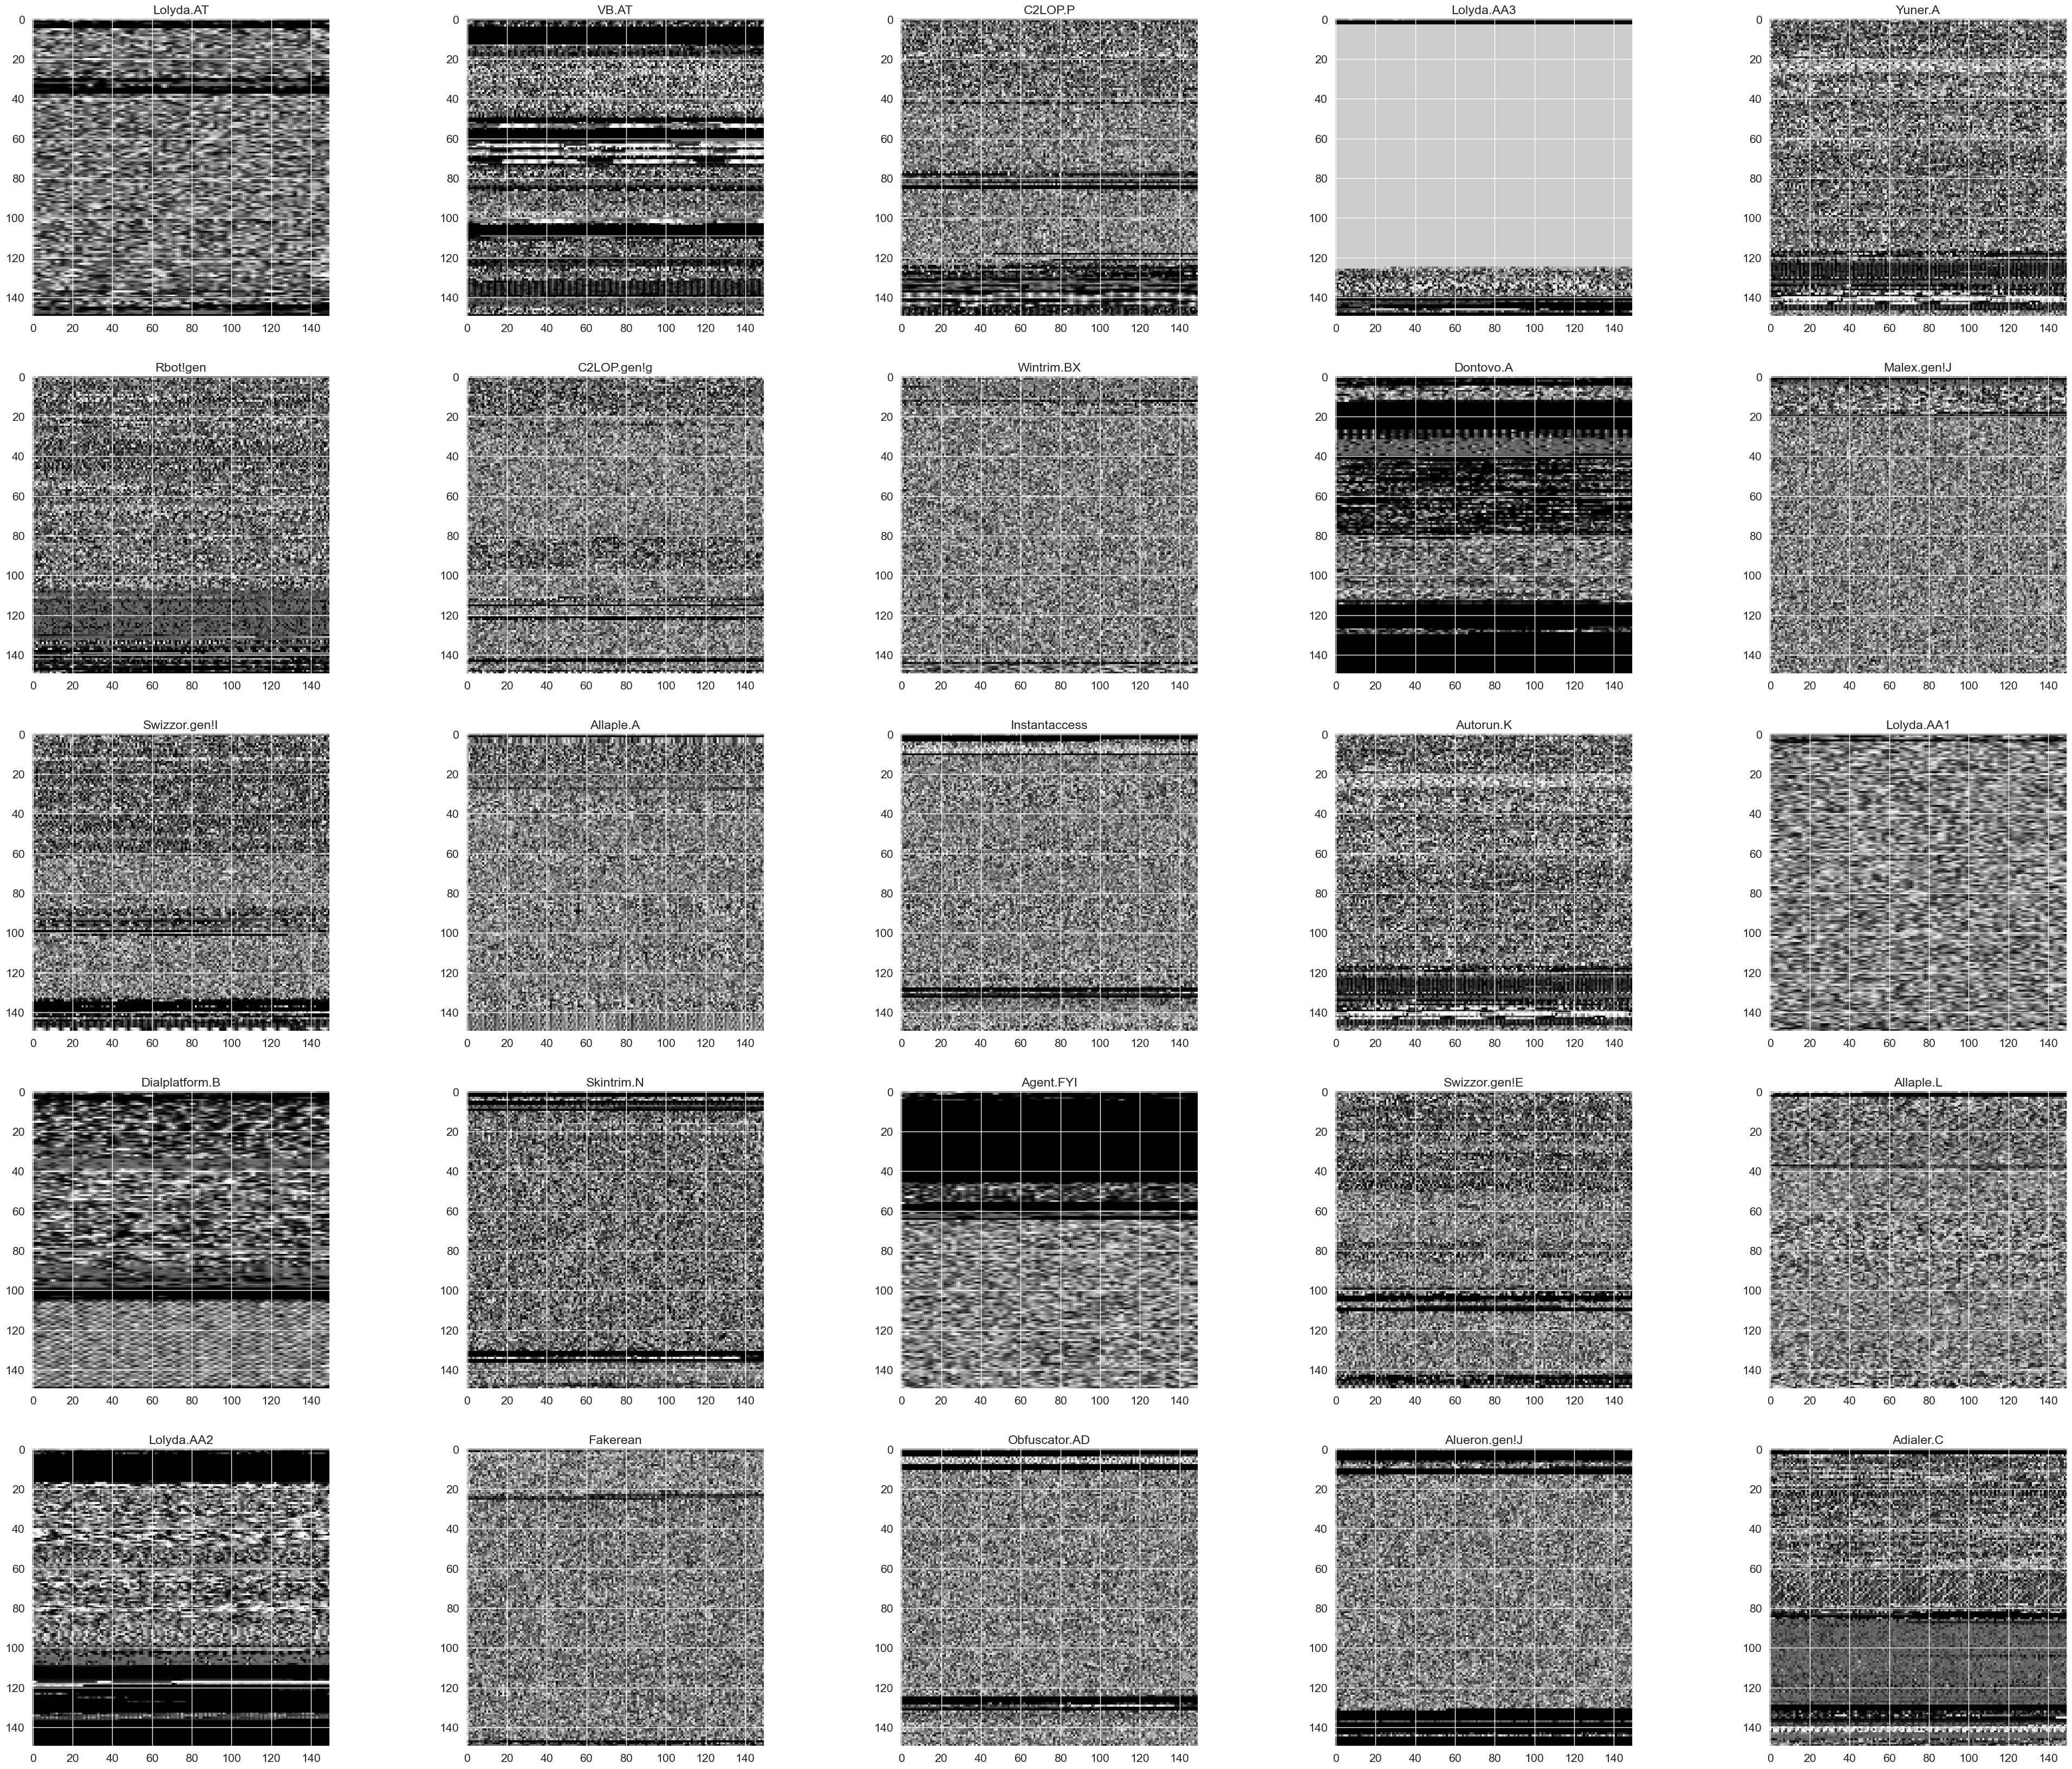

In [5]:
fig = plt.figure(figsize=(50, 50))
for i in range(len(example_images)):
    sub = fig.add_subplot(int(len(example_images)/5) + 1, 5, i + 1)
    sub.title.set_text(class_names[i])
    sub.imshow(example_images[i])


In [6]:
images, labels = shuffle(images, labels, random_state=123)

In [7]:
breakpoint = int(len(images)*0.7)

In [8]:
train_images = images[:breakpoint]
test_images = images[breakpoint:]
train_labels = labels[:breakpoint]
test_labels = labels[breakpoint:]

In [9]:
print(train_labels.shape)
train_images[0].shape


(6537,)


(150, 150, 3)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(len(class_names), activation=tf.nn.softmax)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=6, validation_split=0.2)

Epoch 1/6
41/41 [==============================] - 17s 407ms/step - loss: 190.1791 - accuracy: 0.5345 - val_loss: 0.9756 - val_accuracy: 0.8012
Epoch 2/6
41/41 [==============================] - 17s 410ms/step - loss: 0.4281 - accuracy: 0.9187 - val_loss: 0.3048 - val_accuracy: 0.9518
Epoch 3/6
41/41 [==============================] - 17s 416ms/step - loss: 0.0774 - accuracy: 0.9793 - val_loss: 0.2000 - val_accuracy: 0.9602
Epoch 4/6
41/41 [==============================] - 17s 412ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.1932 - val_accuracy: 0.9725
Epoch 5/6
41/41 [==============================] - 17s 413ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.1941 - val_accuracy: 0.9732
Epoch 6/6
41/41 [==============================] - 17s 415ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2051 - val_accuracy: 0.9732


In [14]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label='acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label='val_acc')
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label='loss')
    plt.plot(history.history['val_loss'], 'ro--', label='val_loss')
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()

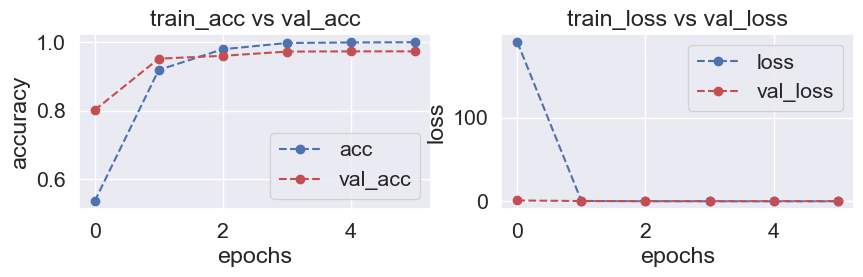

In [15]:
plot_accuracy_loss(history)

In [16]:
test_loss = model.evaluate(test_images, test_labels)

88/88 [==============================] - 2s 28ms/step - loss: 0.3555 - accuracy: 0.9615


In [17]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

88/88 [==============================] - 3s 29ms/step


In [18]:
print(classification_report(test_labels, pred_labels, target_names=class_names))

                precision    recall  f1-score   support

     Lolyda.AT       1.00      0.98      0.99        60
         VB.AT       0.95      1.00      0.97       113
       C2LOP.P       0.67      0.76      0.71        42
    Lolyda.AA3       1.00      0.97      0.98        31
       Yuner.A       1.00      1.00      1.00       238
      Rbot!gen       0.81      0.92      0.86        60
   C2LOP.gen!g       0.80      0.77      0.79        62
    Wintrim.BX       0.96      0.89      0.93        28
     Dontovo.A       1.00      1.00      1.00        56
   Malex.gen!J       0.97      0.81      0.88        36
 Swizzor.gen!I       0.48      0.33      0.39        39
     Allaple.A       0.97      1.00      0.99       892
 Instantaccess       1.00      1.00      1.00       119
     Autorun.K       1.00      1.00      1.00        32
    Lolyda.AA1       0.96      0.96      0.96        67
Dialplatform.B       1.00      0.94      0.97        54
    Skintrim.N       1.00      1.00      1.00  

Como se puede observar en el reporte de las estadísticas se obtuvo un muy buen resultado con el accuracy del modelo (96%) y enfocandonos específicamente en cada categoría la mayoría tiene buen f1-score (>90%) indicando que está clasificando correctamente esas categorías. Dicho esto hay algunas categorías que tienen resultados un poco más bajos y son C2LOP.P, Swizzor.gen!I y Swizzor.gen!E. Es posible que la razón de estos bajos resultados sea porque las imágenes de los Swizzor sean muy parecidas y las esté clasificando cruzadas y que el error de C2LOP.P sea porque lo este confundiendo con C2LOP.gen!g.